# Implementing Algorithms from scratch is a great to practice with a technology stack and improve coding skills as well as understanding of the important algorithms which form the backbone of modern CV.

## Canny Edge Detector implementation

In [1]:
# Import the required modules
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from PIL import Image
from skimage import data
import scipy
from ipywidgets import interact, fixed, FloatSlider, IntSlider, Label, Checkbox, FloatRangeSlider
processed_image = data.camera()/255.

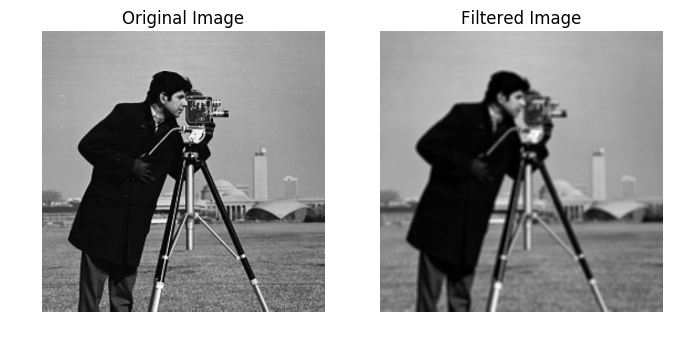

In [2]:
def create_2d_gaussian_kernel(kernel_size=7, sigma=5):
    # Make sure the kernel size is odd
    kernel_size=kernel_size if kernel_size%2 else kernel_size+1
    temp_image = np.zeros((kernel_size, kernel_size))
    # set element at the middle to one
    temp_image[int(kernel_size/2), int(kernel_size/2)] = 1
    scipy.ndimage.filters.gaussian_filter(temp_image, 
            sigma=sigma, order=0, output=None, mode='reflect', cval=0.0)
    # gaussian-smooth the dirac, resulting in a gaussian filter mask
    return scipy.ndimage.filters.gaussian_filter(temp_image, 
            sigma=sigma, order=0, output=None, mode='reflect', cval=0.0)

def demo_smoothing(original_image,kernel_size=7,sigma=5):
    gaussian_kernel_1=create_2d_gaussian_kernel(kernel_size,sigma)
    #gaussian_kernel_2=create_2d_gaussian_kernel(kernel_size,sigma_range[1])
    #difference_of_gaussians=gaussian_kernel_2-gaussian_kernel_1
    processed_image = scipy.ndimage.convolve(original_image, gaussian_kernel_1)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(8,4)
    image_plot = axes_array[0].imshow(original_image,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Image')
    image_plot = axes_array[1].imshow(processed_image,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Filtered Image')
    plt.show()

def gaussian_smoothing(original_image,gaussian_kernel):
    smoothed_image = scipy.ndimage.convolve(original_image, gaussian_kernel)
    return smoothed_image

current_image = data.camera()/255.
temp=interact(demo_smoothing,original_image=fixed(current_image),
              kernel_size=IntSlider(min=2, max=101, step=2,value=7,continuous_update=False),
            sigma=IntSlider(min=0, max=20, step=1,value=5,continuous_update=False));

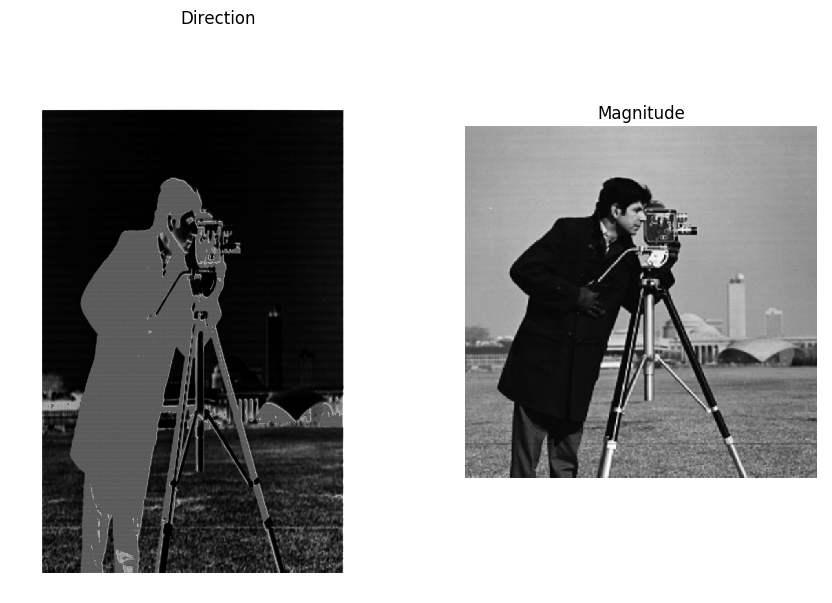

In [3]:
from scipy.ndimage import convolve
plt.rcParams['image.interpolation'] = 'none'
magnitude = data.camera()/255.
direction= data.camera()/255.
horizontal_edge_image = data.camera()/255.
vertical_edge_image = data.camera()/255.

def find_gradient():
    horizontal_kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])
    vertical_kernel = np.array([[ -1.,  0,  1],[ -2,  0,  2],[-1,0,1]])

        # Normalize the kernels
    kernel_sum=abs(np.sum(horizontal_kernel))
    horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
    kernel_sum=abs(np.sum(vertical_kernel))
    vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel
    horizontal_edge_image = scipy.ndimage.convolve(processed_image, horizontal_kernel)
    vertical_edge_image = scipy.ndimage.convolve(processed_image, vertical_kernel)
    magnitude=np.sqrt(horizontal_edge_image**2+vertical_edge_image**2)
    gradient_direction = np.arctan2(vertical_edge_image,horizontal_edge_image)
    direction = 180 + (180/np.pi)*gradient_direction

def display_mag_dir():    
#direction= np.arctan(horizontal_edge_image/vertical_edge_image)*(180/np.pi)
    find_gradient()
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(10,7)
    image_plot = axes_array[0].quiver(np.flipud(horizontal_edge_image),np.flipud(vertical_edge_image) ,scale=0.4,units='dots') # Show the original image
    axes_array[0].axis('off')
    axes_array[0].set(title='Direction')
    image_plot = axes_array[1].imshow(magnitude, cmap=plt.cm.gray) # Show the filtered image
    axes_array[1].axis('off')
    axes_array[1].set(title='Magnitude')
    plt.show()

display_mag_dir()
    
    


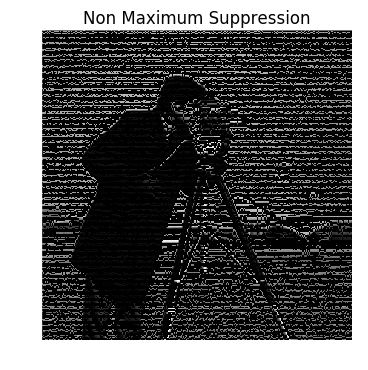

In [4]:
plt.rcParams['image.interpolation'] = 'none'

def normalize_angels(direction):
    x0,y0 = np.where(((direction<22.5)+(direction>157.5)*(direction<202.5)+(direction>337.5)) == True)
    x45,y45 = np.where( ((direction>22.5)*(direction<67.5)+(direction>202.5)*(direction<247.5)) == True)
    x90,y90 = np.where( ((direction>67.5)*(direction<112.5)+(direction>247.5)*(direction<292.5)) == True)
    x135,y135 = np.where( ((direction>112.5)*(direction<157.5)+(direction>292.5)*(direction<337.5)) == True)

    normalized_direction = direction
    normalized_direction[x0,y0] = 0
    normalized_direction[x45,y45] = 45
    normalized_direction[x90,y90] = 90
    normalized_direction[x135,y135] = 135
    
    return normalized_direction

def find_maximum(magnitude,i,j,x1,y1,x2,y2):
    try:
        if (magnitude[i,j] > magnitude[i+x1,j+y1]) and (magnitude[i,j] > magnitude[i+x2,j+y2]):
            return 1
        else:
            return 0  
    except IndexError:
            return -1
        
def non_maximum_supression(magnitude,normalized_direction):
    non_max_suppression_image = magnitude
    x,y = np.shape(non_max_suppression_image)
    
    for i in range(x):
        for j in range(y):
            if normalized_direction[i,j] == 0:
                maximum = find_maximum(magnitude,i,j,1,0,-1,0)
                if not maximum:
                    non_max_suppression_image[i,j] = 0
 
            elif normalized_direction[i,j] == 45:
                maximum = find_maximum(magnitude,i,j,1,-1,-1,1)
                if not maximum:
                    non_max_suppression_image[i,j] = 0
 
            elif normalized_direction[i,j] == 90:
                maximum = find_maximum(magnitude,i,j,0,1,0,-1)
                if not maximum:
                    non_max_suppression_image[i,j] = 0
            
            elif normalized_direction[i,j] == 135:
                maximum = find_maximum(magnitude,i,j,1,1,-1,-1)
                if not maximum:
                    non_max_suppression_image[i,j] = 0
    
    return non_max_suppression_image


#normalized_direction = normalize_angels(direction)
non_max_suppression_image = non_maximum_supression(magnitude,normalize_angels(direction))
plt.figure()
plt.imshow(non_max_suppression_image ,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Non Maximum Suppression')
plt.show()
                                                     


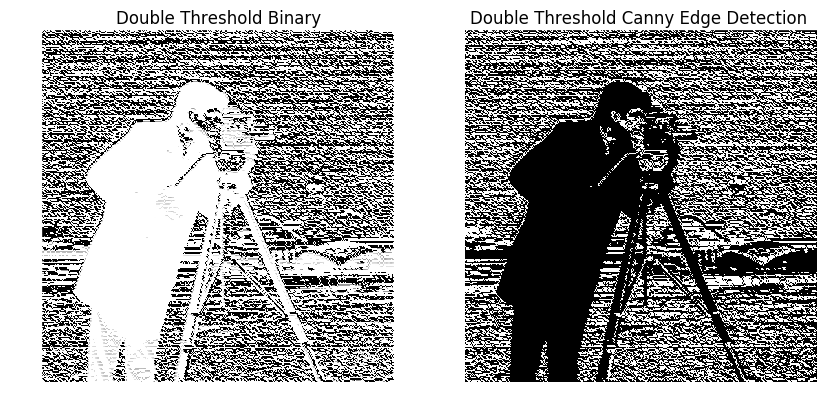

<function __main__.display_image>

In [5]:
def find_8_Connected_neighbour(double_threshold_img,i,j,flag):
    range_8_cell = [-1,0,1]
    for n in range_8_cell:
        for m in range_8_cell:
            if (n == 0 & m == 0):
                continue
            x = i+n
            y = j+m

            try:
                if(flag==1):
                    if (double_threshold_img[x,y] >= 0): 
                        return [x,y]
                elif(flag==0):
                    if (double_threshold_img[x,y] == 1): 
                        return [x,y]
            except IndexError:
                return -1
    return -1

def double_threshold_algo(threshold_range,non_maximum_suppression_image):
    threshold_low = threshold_range[0]
    threshold_high = threshold_range[1]
    x,y = np.shape(non_maximum_suppression_image)
    low_image = np.where(non_maximum_suppression_image<threshold_low,1,0)
    high_image = np.where(non_maximum_suppression_image>=threshold_high,1,0) 
    double_threshold_img = high_image + (np.ones(non_maximum_suppression_image.shape)-high_image-low_image)*non_maximum_suppression_image
    
    for i in range(1,x-1,1):
        for j in range(1,y-1,1):
            connecting_point = -1
            if (double_threshold_img[i][j] == 1):
                connecting_point = find_8_Connected_neighbour(double_threshold_img,i,j,1)
            elif(double_threshold_img[i][j] >= 0):
                connecting_point = find_8_Connected_neighbour(double_threshold_img,i,j,0)          
            if(connecting_point!=-1):
                u = connecting_point[0]
                v = connecting_point[1]
                double_threshold_img[u][v] = 1
     
    return double_threshold_img

def display_image(threshold_range):  
    ced_double_threshold = double_threshold_algo(threshold_range,non_max_suppression_image)
    
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(10,5)
    
    image_plot = axes_array[0].imshow(ced_double_threshold ,cmap=plt.cm.binary)
    axes_array[0].axis('off')
    axes_array[0].set(title='Double Threshold Binary')    
        
    x,y = np.where(ced_double_threshold == 1)
    ced_double_threshold[:,:] = 0
    ced_double_threshold[x,y] = 1
    image_plot = axes_array[1].imshow(ced_double_threshold ,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Double Threshold Canny Edge Detection ')

    plt.show()

interact(display_image,
         threshold_range=FloatRangeSlider(min=0.02, max=1, step=0.01,value=[0.10,0.42],continuous_update=False))
   